## 1.Kütüphaneler


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc

from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")


In [2]:
#tf.keras.datasets.

## 2. Veri setini yükle

In [3]:
mnist=tf.keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(f"{X_train.shape}", {y_train.shape})
print(f"{X_test.shape}", {y_test.shape})

(60000, 28, 28) {(60000,)}
(10000, 28, 28) {(10000,)}


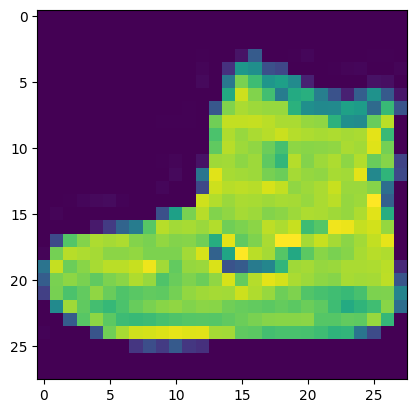

In [5]:
## Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[0])
#plt.colorbar()
plt.grid(False)
plt.show()

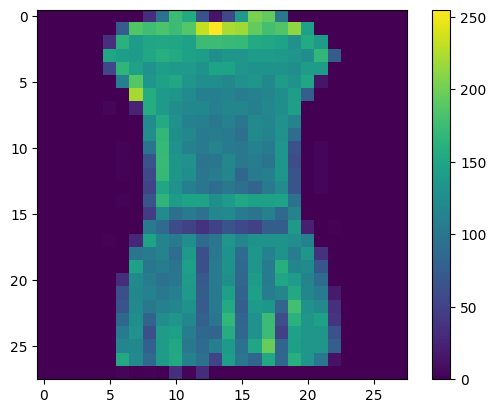

In [6]:
## Verileri görselleştirelim(rastgele)
plt.figure()
plt.imshow(X_train[3])
plt.colorbar()
plt.grid(False)
plt.show()

## 3. Verileri Normalleştirelim

In [7]:
# Verileri 0-1 arasına sıkıştıralım
# Neden 255 e böldük?

X_train = X_train / 255.0

X_test = X_test / 255.0

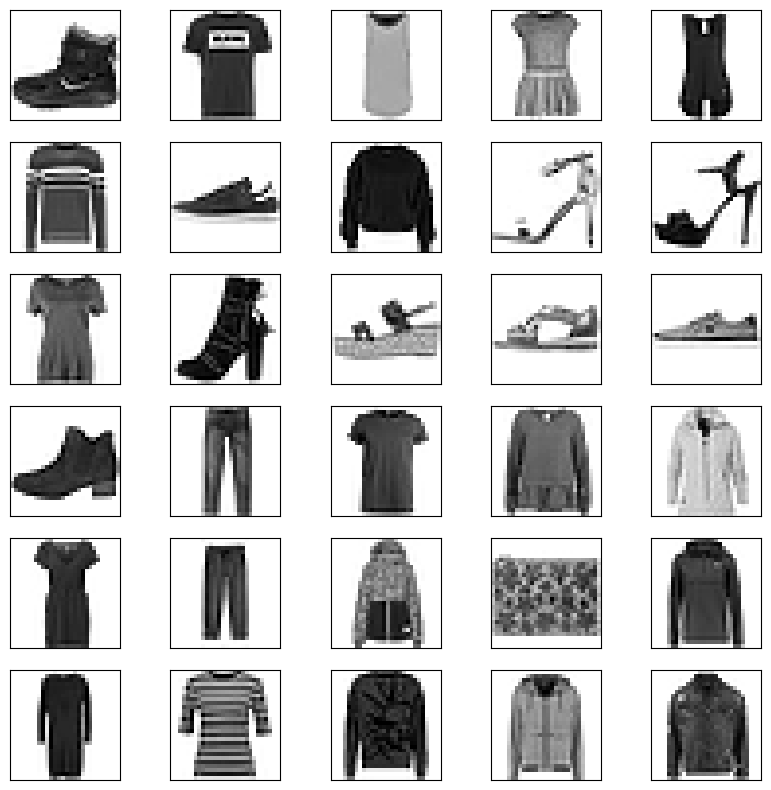

In [8]:
## 30 görüntüyü görselleştirelim

plt.figure(figsize=(10,10))

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

### 4. Makine Öğrenmesi Modeli Oluşturma

In [9]:
X_train.shape[0]

60000

In [10]:
# Verileri 28x28 görüntü formatından 784 özellikli vektörlere düzleştirelim
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [11]:
## X_train.shape[0] veri setindeki örnek sayısı,
# Makine Öğrenmesi modelleri verileri tek boyutlu vektörler olarak alır. 28*28 boyutundaki görüntü 784 özellikli vektöre dönüştürülür. (28*28=784)
# Burdaki -1 kalan boyutu otomotik olarak hesaplar, istersek şu şekilde yapabilirdik; (ikisi aynı sonucu verir)

#X_train = X_train.reshape(X_train.shape[0], 28 * 28)
# X_train.reshape(60000,784)
#X_test = X_test.reshape(X_test.shape[0], 28 * 28)


In [12]:
#?KNeighborsClassifier

In [13]:
## KNN modeli

knn=KNeighborsClassifier().fit(X_train,y_train)

In [14]:
y_pred=knn.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [15]:
acc

0.8554

In [16]:
f1

0.8546439722018904

In [17]:
recall

0.8554

In [18]:
precision

0.8578152450755355

In [21]:
## Random Forest oluştur

In [22]:
from sklearn.ensemble import RandomForestClassifier

#n_estimatorsolusturlacak agac sayisi
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred=knn.predict(X_test)


acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [24]:
print(acc)
print(f1)
print(recall)
print(precision)

0.8554
0.8546439722018904
0.8554
0.8578152450755355


In [26]:
## Karar Ağacı oluştur

In [27]:
#Siniflandirma icin
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

print(acc)
print(f1)
print(recall)
print(precision)

0.7888
0.7896654287555152
0.7888
0.7907944419130593


In [28]:
#Regresyon icin icin
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

print(acc)
print(f1)
print(recall)
print(precision)

0.7825
0.7828640198338868
0.7825
0.7834635976607696


### ÖDEV: Diğer Makine öğrenmesi modelleri için uygulama yapınız

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Veri setini yükleme
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Veriyi yeniden şekillendirme ve normalize etme
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Etiketleri one-hot encoding ile dönüştürme
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# CNN modelini oluşturma
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Modeli değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test doğruluğu: {test_acc:.2f}')


Epoch 1/10
938/938 [==============================] - 10s 6ms/step - loss: 0.5515 - accuracy: 0.7969 - val_loss: 0.4079 - val_accuracy: 0.8509
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3513 - accuracy: 0.8712 - val_loss: 0.3573 - val_accuracy: 0.8726
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2963 - accuracy: 0.8922 - val_loss: 0.3115 - val_accuracy: 0.8879
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2668 - accuracy: 0.9009 - val_loss: 0.3120 - val_accuracy: 0.8886
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2425 - accuracy: 0.9121 - val_loss: 0.2939 - val_accuracy: 0.8953
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2221 - accuracy: 0.9173 - val_loss: 0.2723 - val_accuracy: 0.8996
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2021 - accuracy: 0.9258 - val_loss: 0.2808 - val_accuracy: 0.9011
Epoch

In [31]:
y_pred=model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
cm

313/313 [==============================] - 1s 2ms/step


array([[862,   0,  11,  16,   3,   1, 101,   0,   6,   0],
       [  2, 966,   0,  25,   1,   0,   4,   0,   2,   0],
       [ 15,   1, 864,   5,  25,   0,  86,   0,   4,   0],
       [ 17,   1,  12, 900,  19,   0,  45,   0,   6,   0],
       [  0,   1,  75,  17, 798,   0,  97,   0,  12,   0],
       [  0,   0,   0,   1,   0, 983,   0,  11,   0,   5],
       [120,   0,  46,  23,  33,   1, 765,   0,  12,   0],
       [  0,   0,   0,   0,   0,  15,   0, 974,   0,  11],
       [  3,   1,   3,   2,   1,   2,   0,   4, 984,   0],
       [  1,   0,   0,   0,   0,   8,   0,  45,   0, 946]])

## 5. YSA ile Model Eğitimi

### BONUS :  CNN

In [32]:
mnist=tf.keras.datasets.fashion_mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [33]:
# veri normalleştirme

In [34]:
# burdaki -1 yine otomotik olarak uygun değeri belirliyor -1 yerine direk örnek sayısını yazabilirsiniz ör:60000 veya X_train.shape[0], X_test.shape[0]
# 28*28 boyutlu 1 kanalı görüntüye çevirdik (gray), ayrıca veri tipini float32 yapıp normalize ettik
# şu kodda aynı sonucu verir;

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0


In [35]:
## classlar için one hot encoding işlemi yapalım
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [36]:
model = models.Sequential([
    # İlk Konvolüsyonel Katman
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # İkinci Konvolüsyonel Katman
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Üçüncü Konvolüsyonel Katman
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Tam Bağlantılı Katmanlar
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    # Çıkış Katmanı
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)       

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Erken durdurma ve öğrenme oranını azaltma
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [38]:
hist = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
938/938 [==============================] - 12s 7ms/step - loss: 0.7382 - accuracy: 0.7432 - val_loss: 0.4457 - val_accuracy: 0.8353 - lr: 0.0010
Epoch 2/50
938/938 [==============================] - 8s 8ms/step - loss: 0.4884 - accuracy: 0.8242 - val_loss: 0.3945 - val_accuracy: 0.8575 - lr: 0.0010
Epoch 3/50
938/938 [==============================] - 7s 7ms/step - loss: 0.4304 - accuracy: 0.8458 - val_loss: 0.3533 - val_accuracy: 0.8686 - lr: 0.0010
Epoch 4/50
938/938 [==============================] - 7s 7ms/step - loss: 0.4041 - accuracy: 0.8551 - val_loss: 0.3274 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 5/50
938/938 [==============================] - 6s 6ms/step - loss: 0.3776 - accuracy: 0.8636 - val_loss: 0.3695 - val_accuracy: 0.8575 - lr: 0.0010
Epoch 6/50
938/938 [==============================] - 7s 7ms/step - loss: 0.3638 - accuracy: 0.8693 - val_loss: 0.3517 - val_accuracy: 0.8689 - lr: 0.0010
Epoch 7/50
938/938 [==============================] - 6s 7ms/step - l

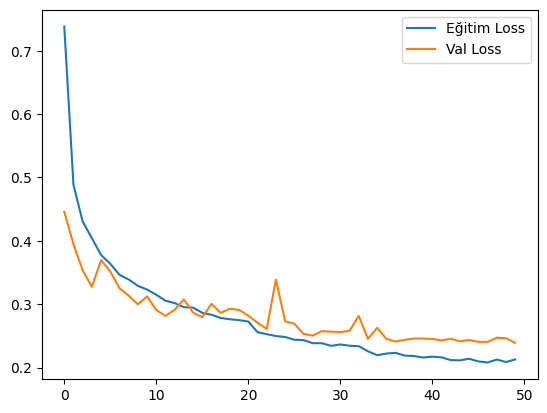

In [39]:
plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

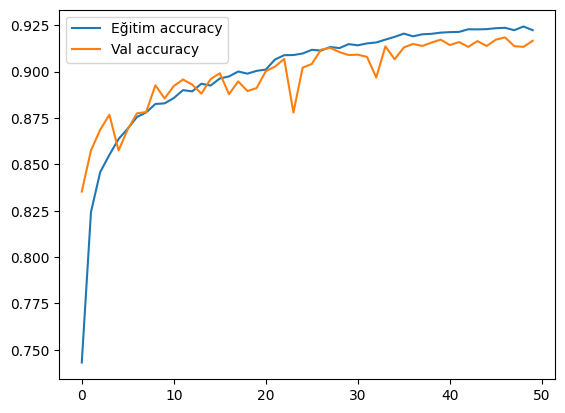

In [40]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

In [41]:
y_pred=model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
cm

313/313 [==============================] - 1s 2ms/step


array([[845,   1,  27,  12,   2,   1, 106,   0,   6,   0],
       [  0, 977,   2,  14,   1,   0,   4,   0,   2,   0],
       [ 12,   1, 897,  10,  33,   0,  47,   0,   0,   0],
       [  6,   5,  17, 914,  24,   0,  34,   0,   0,   0],
       [  1,   0,  38,  21, 871,   0,  67,   0,   2,   0],
       [  0,   0,   0,   2,   0, 977,   0,  10,   0,  11],
       [ 77,   0,  60,  23,  63,   0, 771,   0,   6,   0],
       [  0,   0,   0,   0,   0,  11,   0, 965,   0,  24],
       [  0,   0,   3,   3,   1,   2,   4,   0, 986,   1],
       [  0,   0,   0,   0,   0,   3,   0,  33,   1, 963]])